# **TSF - Task - Exploratry Business Analytics**

Perform the "Exploratry Data Analysis" on the provided dataset "SuperSamplestore.csv" 
Here we drive the buisness outcomes based on the previsous sales and profits for different region in different - different categories.
Here the whole analysis is carried out with the help of programming language "Python".

CLICK TO GET THE DATASET :
[Dataset](https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view)


# Importing the standard Libraries

In [65]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Reading the Dataset "SuperSamplestore" using pandas


In [66]:
df = pd.read_csv("SampleSuperstore.csv")

# Properties of Dataset

In [67]:
df.shape

(9994, 13)

In [68]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Dataset Statistics

In [69]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [71]:
df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

# Count the no. of null cell in each Column

In [72]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# No. of unique values for each Column

In [73]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Drop the "Country" and "Postal Code" column

All the records belongs to the same Country and Postal Code column is of no significance in sales and profit analysis

In [74]:
df.drop('Postal Code', axis=1 , inplace = True )
df.drop('Country', axis=1 , inplace = True )

# No. of records belong to each Category

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

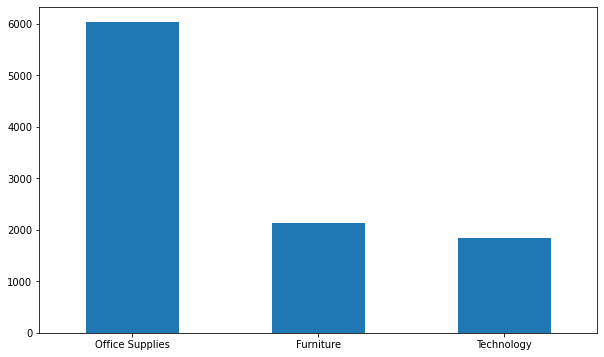

In [75]:
plt.figure(figsize = (10,6))
df['Category'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

From the above bar plot it is clear that office supplies have most sales

# % share in Sales by each Sub-Category 

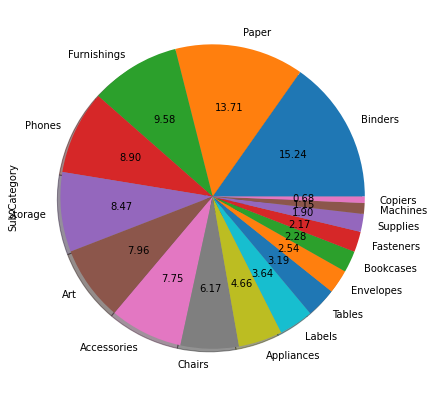

In [76]:
fig = plt.figure(figsize = (10,7))
df['Sub-Category'].value_counts().plot.pie(autopct = '%.2f',shadow = True)

Binders has the most sales in sub-category followed by Paper, Furnishings, Phones, Storage

# Sales representation for each Category in every Zone/Region

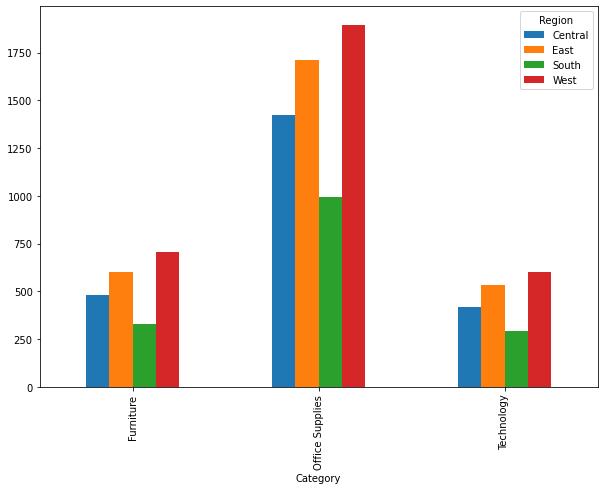

In [77]:
pd.crosstab(df['Category'] , df['Region']).plot(kind = 'bar' , figsize=(10,7))

Sales of Office Supplies are maximum in every region
 
Also, West US has maximum sales while South US have minimum sales

# Adding a column having Profit % for each record

In [78]:
df['% Profit'] = (df['Profit']/df['Sales'])*100
df.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,% Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,29.00
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656,27.00
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152,10.00
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,31.25
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,30.00


# Maximum Profit %

In [79]:
print('Maximum Profit : {}'.format(max(df['% Profit'])))

Maximum Profit : 50.0


# Minimum Profit %

In [80]:
print('Maximum Loss : {}'.format(min(df['% Profit'])))

Maximum Loss : -275.0


# Records with -ve Profit %

In [81]:
df['% Profit'][df['% Profit']<0].count()

1871

Total 1871 transaction or says deals had commit a loss 

In [82]:
df['% Profit'][df['% Profit']<0].value_counts()


-80.000000     74
-20.000000     65
-70.000000     62
-73.333333     54
-160.000000    42
               ..
-34.545455      1
-18.571429      1
-220.000000     1
-31.428571      1
-122.500000     1
Name: % Profit, Length: 311, dtype: int64

# Records having Profit % in -ve 

In [83]:
df_loss = df[df['% Profit']<0]
df_loss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,% Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000


# **City wise Profit**

In [84]:
profit_cities = df.groupby('City').sum()['Profit']
profit_cities

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

# Sorting of Cities in order of their Profit sum

In [85]:
profit_cities.sort_values(ascending = False).head(10)

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64

Top 10 Cities which have the maximum profit 


#  Graph of top 5 and bottom 5 Cities against their Profit sum

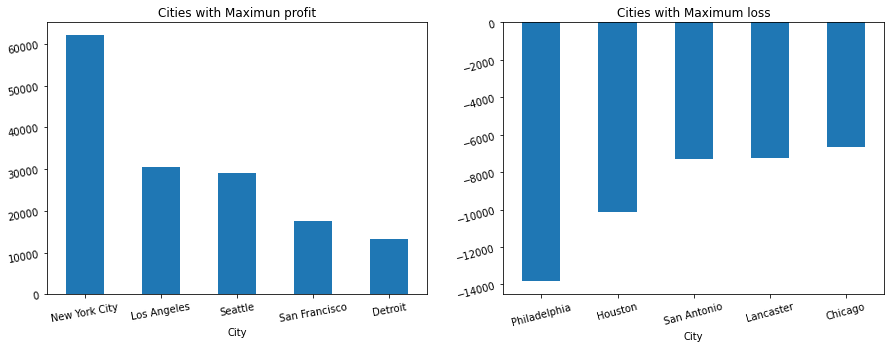

In [86]:
fig , axes = plt.subplots(1,2, figsize = (15,5))
profit_cities.sort_values(ascending = False ).head().plot(kind = 'bar' ,ax = axes[0])
axes[0].set_title("Cities with Maximun profit")
axes[0].tick_params(labelrotation = 10)

profit_cities.sort_values(ascending= True ).head().plot(kind = 'bar' ,ax = axes[1])
axes[1].tick_params(rotation = 15)
axes[1].set_title("Cities with Maximum loss")

plt.show()

New York City has maximum profit and Philadelphia has maximum loss

# **State wise profit**


State wise profit distribution

In [87]:
state_profit = df.groupby('State').sum()['Profit']
print(state_profit.shape)
state_profit.head()

(49,)


State
Alabama        5786.8253
Arizona       -3427.9246
Arkansas       4008.6871
California    76381.3871
Colorado      -6527.8579
Name: Profit, dtype: float64

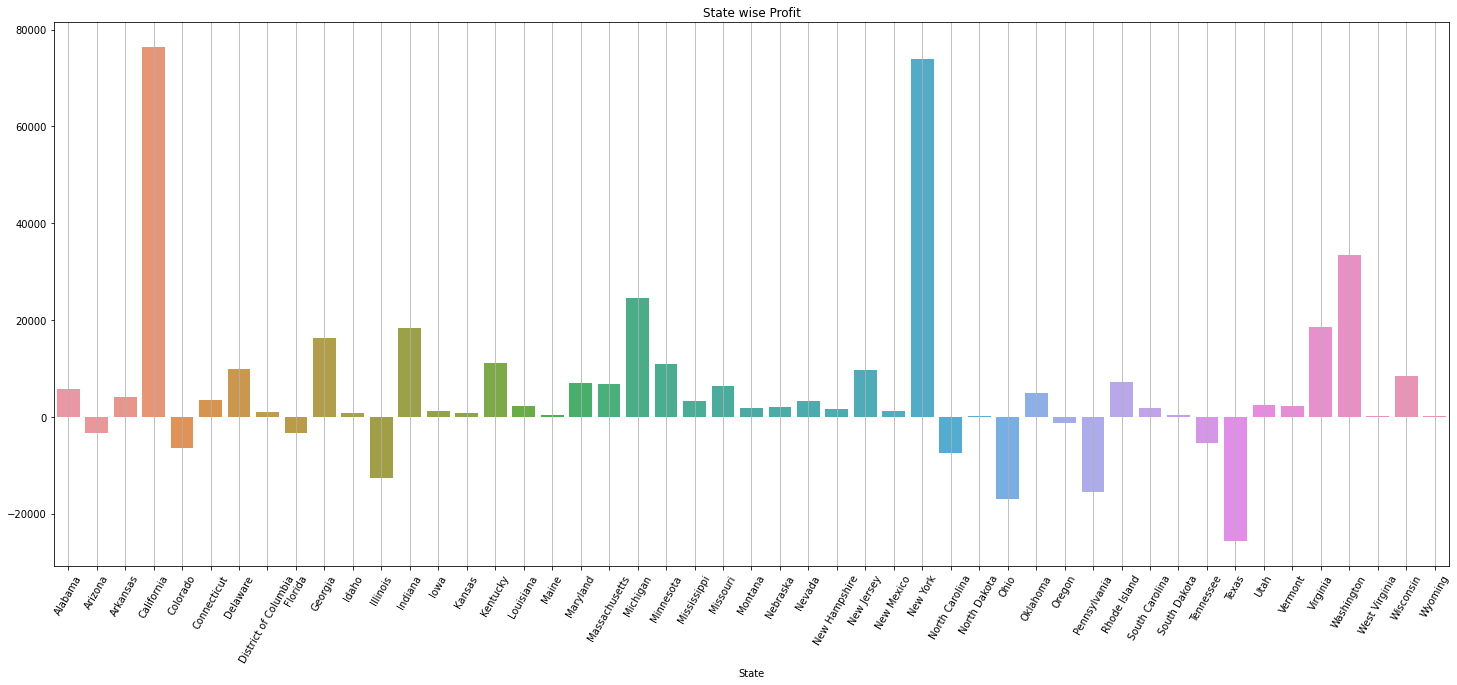

In [88]:
plt.figure(figsize = (25,10))
sns.barplot(x=state_profit.index , y=state_profit.values)
plt.title("State wise Profit")
plt.xticks(rotation = 60)
plt.grid(b=True , axis = 'x')
plt.show()

According to the barplot, California has the maximum profit while Virginia has the minimum profit

# **Region wise Profit**

Region wise profit distribution

In [89]:
region_profit = pd.DataFrame(df.groupby('Region').sum()['Profit'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


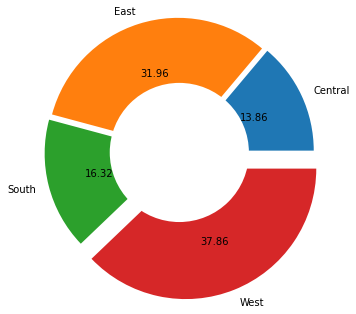

In [90]:
plt.pie(region_profit , labels= region_profit.index , autopct = "%.2f" , explode = (0.05,0.05,0.05,0.20) , radius =1.5)
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

East Region has the most profit

# **City wise Sales**

In [91]:
city_sale = pd.DataFrame(df.groupby('City').sum()['Sales'])
city_sale_sort = city_sale.sort_values(by='Sales',ascending=False)
city_sale_sort.head()

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


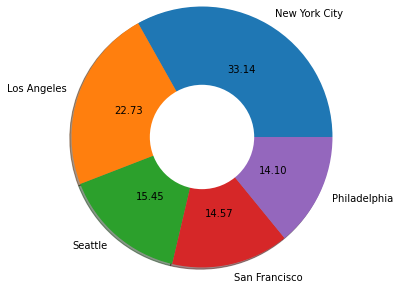

In [92]:
plt.pie(city_sale_sort.head() , labels = city_sale_sort.head().index,autopct = '%.2f',shadow=True,radius = 1.5)

centre_circle = plt.Circle((0,0) , 0.6 , fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

From the pie chart, it is clear that New York City has maximum sales followed by Los Angeles.

# **State wise Sales**

In [93]:
state_sale = pd.DataFrame(df.groupby('State').sum()['Sales'])
state_sale_sort = state_sale.sort_values(by='Sales',ascending=False)
state_sale_sort.head()

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


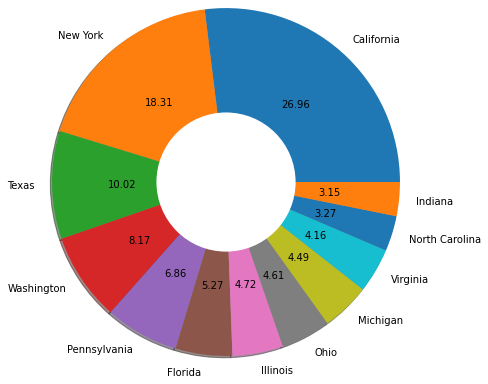

In [94]:
plt.pie(state_sale_sort.head(12),labels=state_sale_sort.head(12).index,autopct='%.2f',shadow=True,radius=2)

centre_circle = plt.Circle((0,0),0.8,fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

From the pie chart, it is clear that New York City has maximum sales followed by Los Angeles.

# **Region wise Sales**

In [95]:
region_sale = pd.DataFrame(df.groupby('Region').sum()['Sales'])
region_sale_sort =region_sale.sort_values(by= 'Sales',ascending = False)
region_sale_sort

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


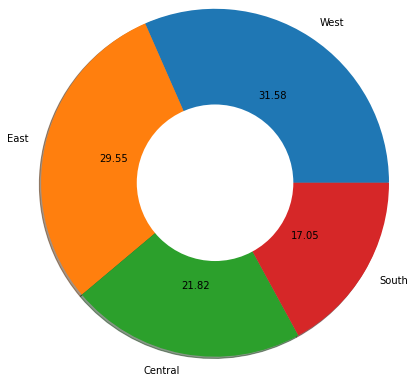

In [96]:
plt.pie(region_sale_sort, labels = region_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)
centre_circle = plt.Circle((0,0), 0.90, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

As per the Rregion Wise Sales, West region has maximum sales with 31.58 followed by East with 29.55, Central with 21.82 and South region has minimum sales with 17.05

# No. of Duplicates

In [97]:
df.duplicated().sum()

50

Dropping the Duplicates value

In [98]:
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)
df

(9944, 12)


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,% Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,16.25
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,17.00
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,7.50
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,45.00


# **Correlation between different entites (representation via Heatmap)**

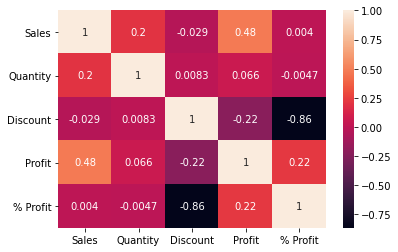

In [99]:
corr=df.corr()
sns.heatmap(corr,annot=True)

From here , Sales and profit are strongly correlated . As the Discount increase Profit decreases and vice-versa 

# Count plot for each Segment

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


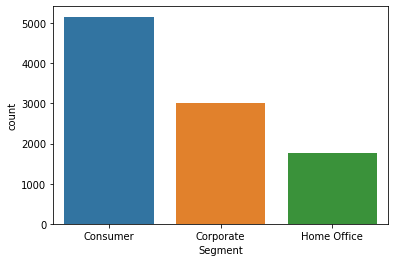

In [100]:
sns.countplot(df['Segment'])
plt.show()

Consumer segment had the maximum sales and Home Office had minimum

# **Histogram**

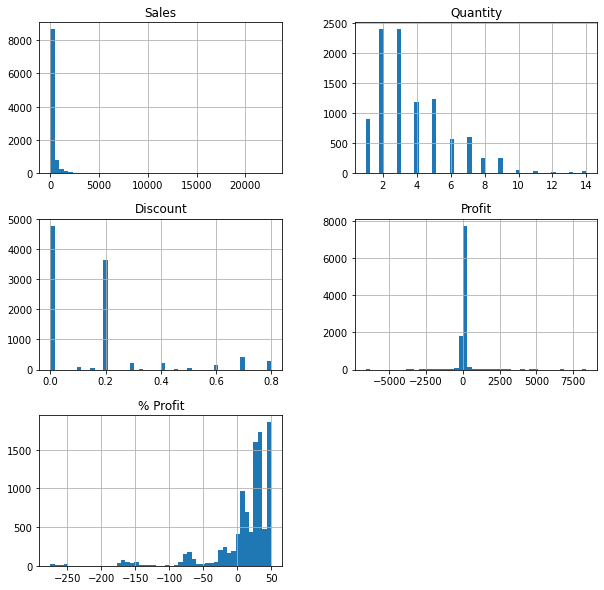

In [101]:

df.hist(figsize=(10,10),bins=50)
plt.show()


# **Heatmap of Sales in every City by Category**

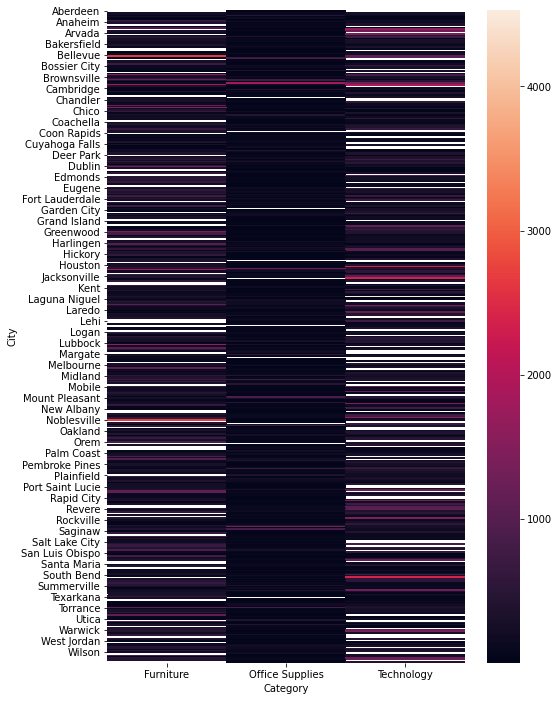

In [102]:
df1 = df[['City','Category','State','Sales','Profit','Segment']]

heatmap1 = pd.pivot_table(df1,values='Sales',index='City',columns='Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap1)

# **Heatmap of Sales in every State by Category**

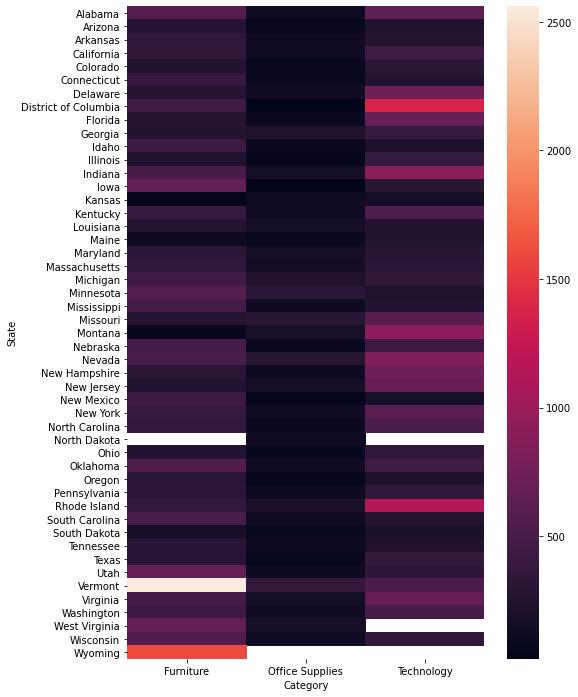

In [103]:
heatmap2 = pd.pivot_table(df1,values='Sales',index='State',columns='Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap2)

# **Heatmap of Profit in every State by Category**

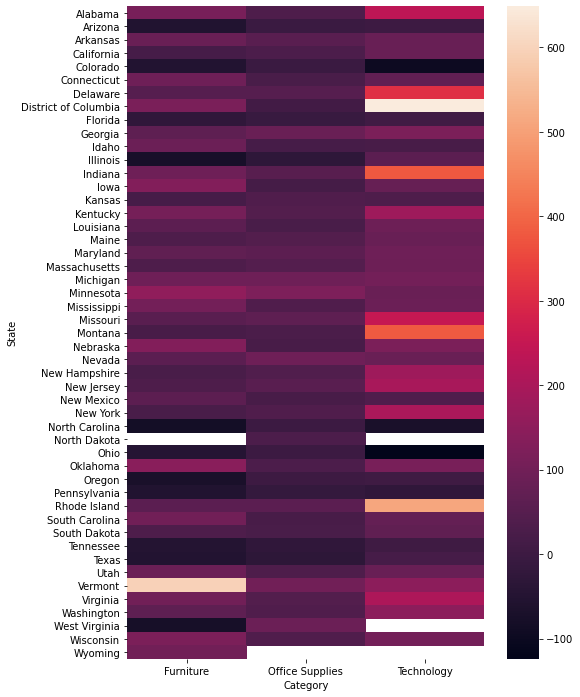

In [115]:
heatmap3 = pd.pivot_table(df1,values='Profit',index='State',columns='Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap3)

# **Heatmap of profit in every city by category**

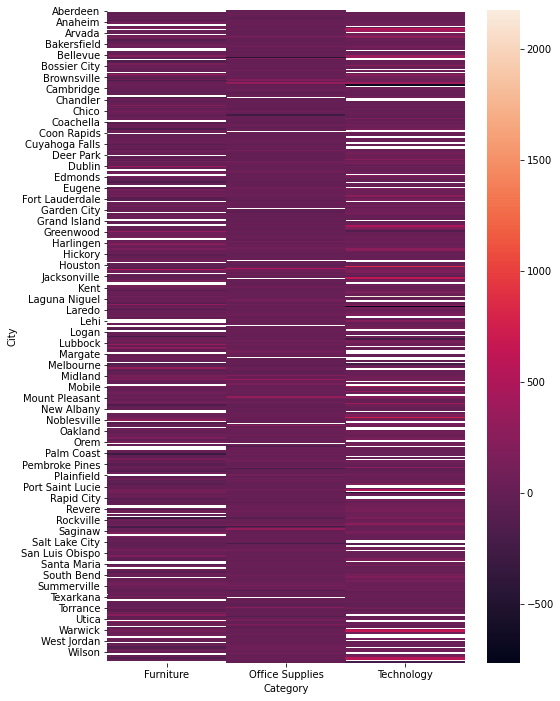

In [105]:
heatmap4 = pd.pivot_table(df1,values='Profit',index='City',columns='Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap4)

# **Heatmap of Profit in every City by Segment**

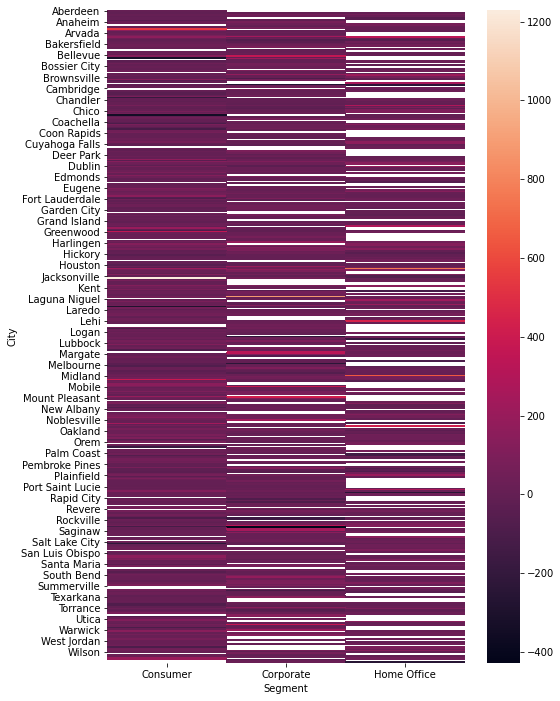

In [106]:
heatmap5 = pd.pivot_table(df1,values='Profit',index='City',columns='Segment')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap5)

# **Heatmap of Profit in every State by Segment**

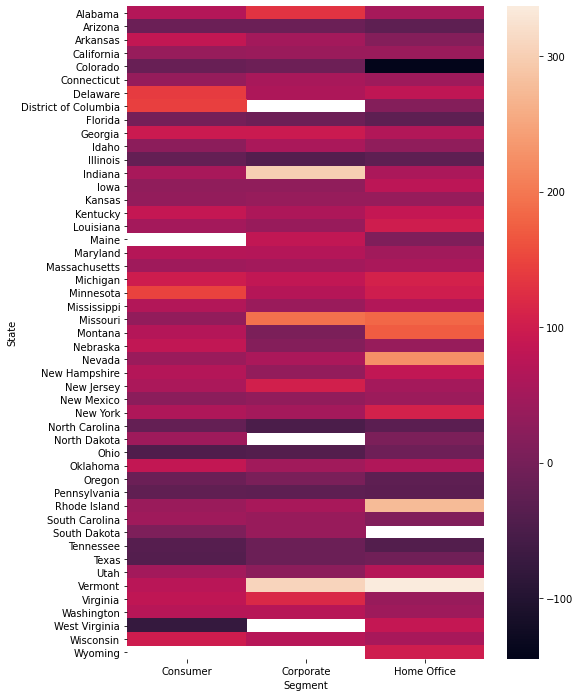

In [107]:
heatmap6 = pd.pivot_table(df1,values='Profit',index='State',columns='Segment')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap6)

# **Heatmap of Sales in every City by Segment**

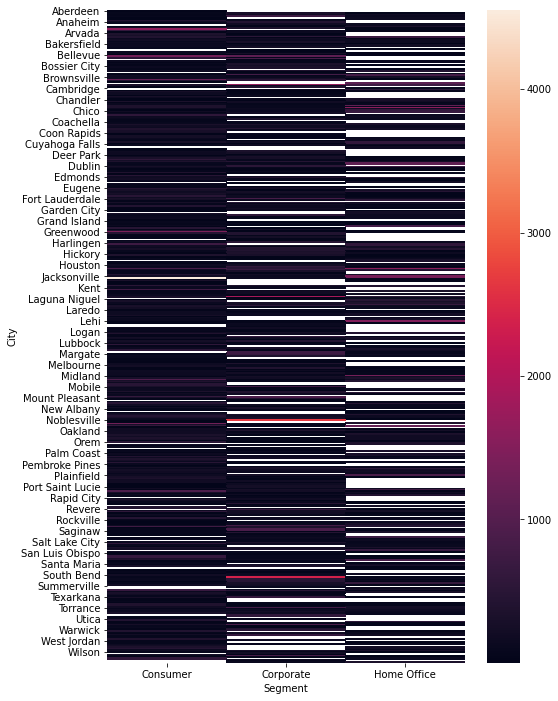

In [108]:
heatmap7 = pd.pivot_table(df1,values='Sales',index='City',columns='Segment')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap7)

# **Heatmap of Sales in every State by Segment**

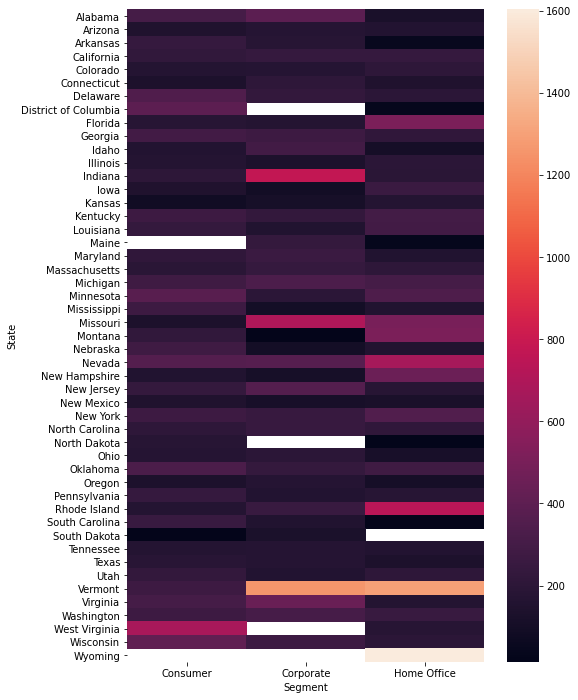

In [109]:
heatmap8 = pd.pivot_table(df1,values='Sales',index='State',columns='Segment')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap8)

# **Heatmap of Sales in every City by Sub-Category**

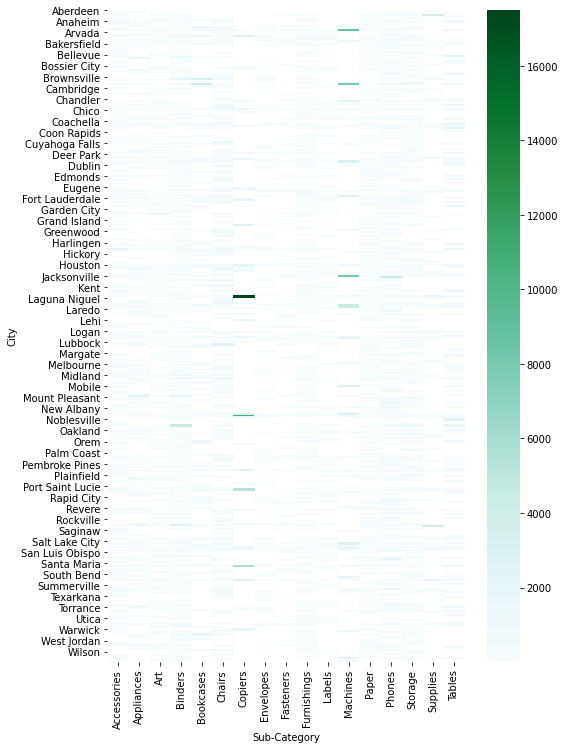

In [110]:
heatmap9 = pd.pivot_table(df,values='Sales',index='City',columns='Sub-Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap9,cmap='BuGn')

# **Heatmap of Sales in every State by Sub-Category**

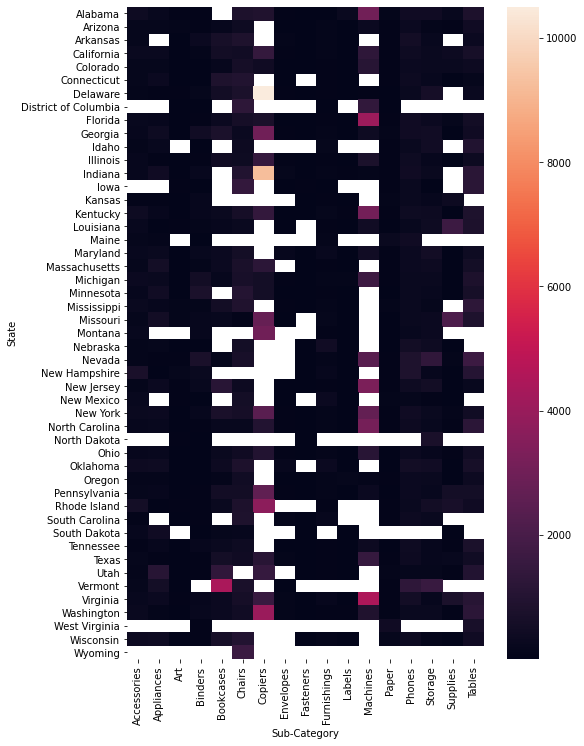

In [111]:
heatmap10 = pd.pivot_table(df,values='Sales',index='State',columns='Sub-Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap10)

# **Heatmap of Profit in every City by Sub-Category**

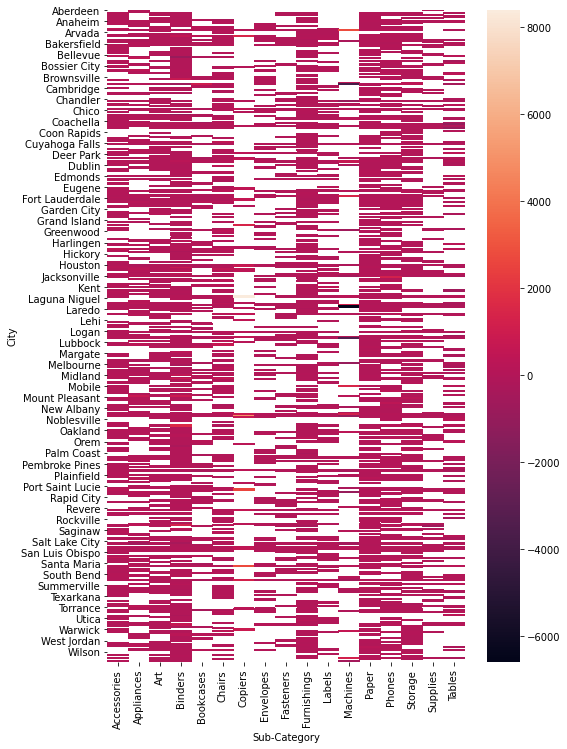

In [112]:
heatmap11 = pd.pivot_table(df,values='Profit',index='City',columns='Sub-Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap11)

# **Heatmap of Profit in every State by Sub-Category**

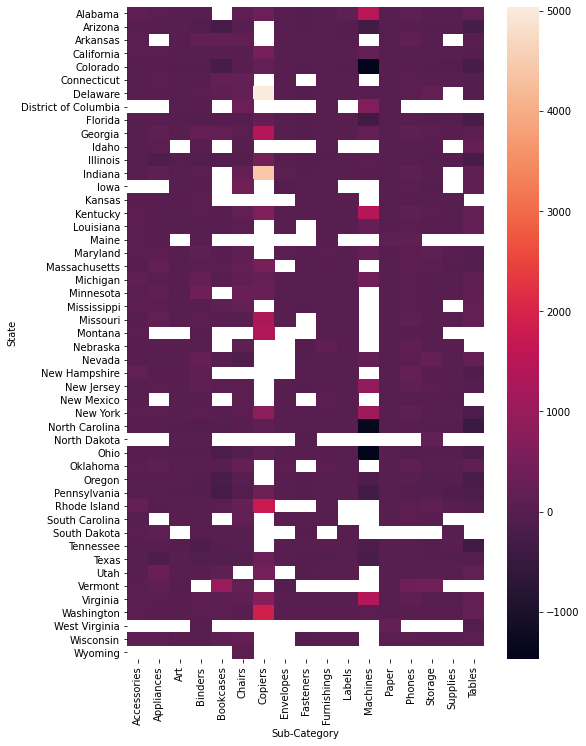

In [113]:
heatmap12 = pd.pivot_table(df,values='Profit',index='State',columns='Sub-Category')

plt.figure(figsize=(8,12))
sns.heatmap(heatmap12)

# **Profits and Sales per Sub-Category**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 792x504 with 0 Axes>

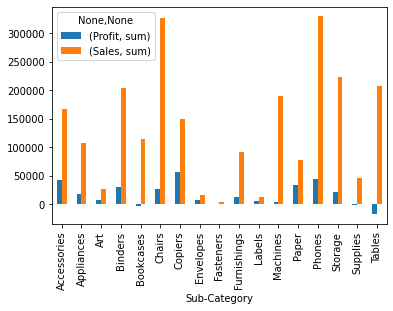

In [114]:
plt.figure(figsize=(11,7))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()